In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
xlsx = pd.ExcelFile('Hwage.xlsx')

In [3]:
wages = pd.read_excel(xlsx, 'Sheet1')
wages.head()

,Hwage,Educ,Exper,Female,Union
0,9.0,10,27,0,0
1,5.5,12,20,0,0
2,3.8,12,4,1,0
3,10.5,12,29,1,0
4,15.0,12,40,0,1


In [4]:
wages.shape

(527, 5)

In [5]:
wages.isna().sum()

Hwage     0
Educ      0
Exper     0
Female    0
Union     0
dtype: int64

In [6]:
wages.dtypes

Hwage     float64
Educ        int64
Exper       int64
Female      int64
Union       int64
dtype: object

In [7]:
wages.Educ.unique()

array([10, 12, 16, 14,  8, 17, 13, 18, 15,  9,  7, 11,  6])

In [8]:
"""
wages['Educ'].replace([6, 7, 8, 9], 'MiddleSchool', inplace=True)
wages['Educ'].replace([9, 10, 11, 12], 'HighSchool', inplace=True)
wages['Educ'].replace([13, 14, 15, 16, 17, 18], 'College', inplace=True)
"""



"\nwages['Educ'].replace([6, 7, 8, 9], 'MiddleSchool', inplace=True)\nwages['Educ'].replace([9, 10, 11, 12], 'HighSchool', inplace=True)\nwages['Educ'].replace([13, 14, 15, 16, 17, 18], 'College', inplace=True)\n"

In [9]:
Education_Level = []

for row in wages['Educ']:
    if row <= 9:
        Education_Level.append('MiddleSchool')
    elif row <= 12:
        Education_Level.append('HighSchool')
    else:
        Education_Level.append('College')
        
wages['Education_Level'] = Education_Level

In [10]:
wages.head()

,Hwage,Educ,Exper,Female,Union,Education_Level
0,9.0,10,27,0,0,HighSchool
1,5.5,12,20,0,0,HighSchool
2,3.8,12,4,1,0,HighSchool
3,10.5,12,29,1,0,HighSchool
4,15.0,12,40,0,1,HighSchool


In [11]:
wages.describe()

,Hwage,Educ,Exper,Female,Union
count,527.000000,527.000000,527.000000,527.000000,527.000000
mean,8.980266,13.085389,17.690702,0.461101,0.182163
std,4.910993,2.491490,12.150716,0.498958,0.386346
min,1.750000,6.000000,0.000000,0.000000,0.000000
25%,5.250000,12.000000,8.000000,0.000000,0.000000
50%,7.780000,12.000000,15.000000,0.000000,0.000000
75%,11.250000,15.000000,26.000000,1.000000,0.000000
max,26.290000,18.000000,49.000000,1.000000,1.000000


In [12]:
print("Means for each attribute:")
wages[['Hwage', 'Educ', 'Exper', 'Female', 'Union']].mean()

Means for each attribute:


Hwage      8.980266
Educ      13.085389
Exper     17.690702
Female     0.461101
Union      0.182163
dtype: float64

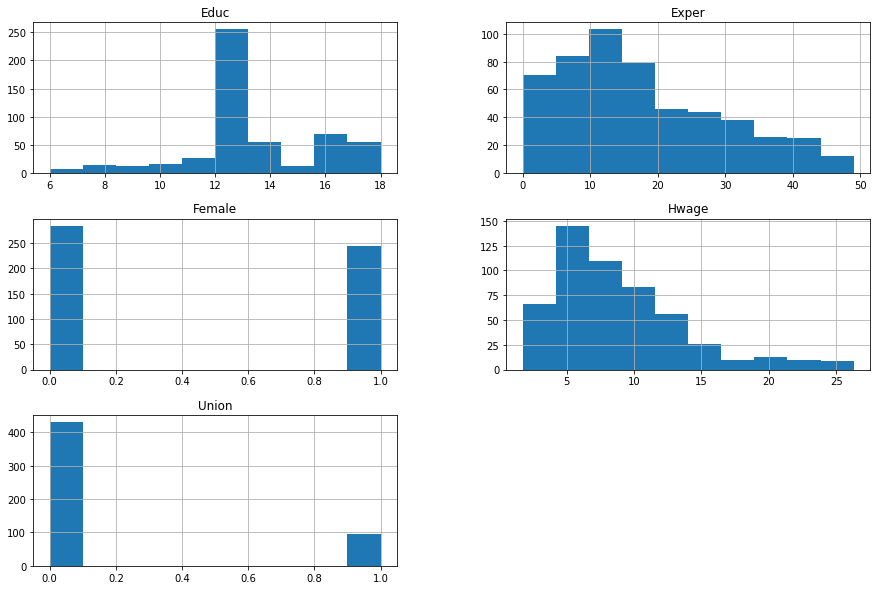

In [13]:
# sns.relplot(x="Educ", y="Hwage", hue="Female", data=wages);

wages.hist(figsize=(15, 10));

In [14]:
wages_HighSchool = wages[(wages['Hwage']==wages['Hwage']) & (wages['Education_Level']=='HighSchool')]
wages_HighSchool.head()

,Hwage,Educ,Exper,Female,Union,Education_Level
0,9.0,10,27,0,0,HighSchool
1,5.5,12,20,0,0,HighSchool
2,3.8,12,4,1,0,HighSchool
3,10.5,12,29,1,0,HighSchool
4,15.0,12,40,0,1,HighSchool


In [15]:
# About half of the sample have acquired only a HighSchool level of education

wages_HighSchool.shape

(262, 6)

In [16]:
wages_HighSchool.describe()

,Hwage,Educ,Exper,Female,Union
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,7.658626,11.767176,18.729008,0.480916,0.183206
std,3.633302,0.556390,12.272100,0.500592,0.387576
min,1.750000,10.000000,0.000000,0.000000,0.000000
25%,4.850000,12.000000,9.000000,0.000000,0.000000
50%,6.935000,12.000000,16.000000,0.000000,0.000000
75%,9.567500,12.000000,27.000000,1.000000,0.000000
max,22.200000,12.000000,46.000000,1.000000,1.000000


In [17]:
wages_HighSchool[['Hwage', 'Educ', 'Exper', 'Female', 'Union']].mean()

Hwage      7.658626
Educ      11.767176
Exper     18.729008
Female     0.480916
Union      0.183206
dtype: float64

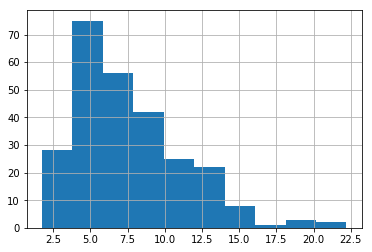

In [18]:
wages_HighSchool['Hwage'].hist()

In [19]:
wages_MiddleSchool = wages[(wages['Hwage']==wages['Hwage']) & (wages['Education_Level']=='MiddleSchool')]
wages_MiddleSchool.head()

,Hwage,Educ,Exper,Female,Union,Education_Level
8,11.00,8,42,0,0,MiddleSchool
46,9.00,8,33,0,1,MiddleSchool
50,3.50,9,47,0,1,MiddleSchool
54,9.60,9,33,0,1,MiddleSchool
55,6.88,8,22,1,0,MiddleSchool


In [20]:
wages_MiddleSchool.describe()

,Hwage,Educ,Exper,Female,Union
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,6.282286,8.028571,33.514286,0.485714,0.257143
std,3.205020,0.923093,11.425903,0.507093,0.443440
min,3.000000,6.000000,8.000000,0.000000,0.000000
25%,4.425000,8.000000,28.000000,0.000000,0.000000
50%,5.260000,8.000000,34.000000,0.000000,0.000000
75%,7.500000,9.000000,43.000000,1.000000,0.500000
max,19.980000,9.000000,49.000000,1.000000,1.000000


In [21]:
wages_MiddleSchool[['Hwage', 'Educ', 'Exper', 'Female', 'Union']].mean()

Hwage      6.282286
Educ       8.028571
Exper     33.514286
Female     0.485714
Union      0.257143
dtype: float64

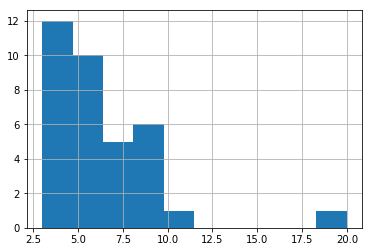

In [22]:
wages_MiddleSchool['Hwage'].hist()

In [23]:
wages_College = wages[(wages['Hwage']==wages['Hwage']) & (wages['Education_Level']=='College')]
wages_College.head()

,Hwage,Educ,Exper,Female,Union,Education_Level
5,9.00,16,27,1,0,College
7,15.00,14,22,0,0,College
10,24.98,17,18,0,0,College
11,20.40,17,3,0,0,College
12,25.00,14,4,0,1,College


In [24]:
wages_College.describe()

,Hwage,Educ,Exper,Female,Union
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,10.896348,15.356522,14.100000,0.434783,0.169565
std,5.659354,1.643786,9.779379,0.496810,0.376069
min,2.010000,13.000000,0.000000,0.000000,0.000000
25%,6.250000,14.000000,7.000000,0.000000,0.000000
50%,10.000000,16.000000,13.000000,0.000000,0.000000
75%,13.855000,16.000000,19.000000,1.000000,0.000000
max,26.290000,18.000000,44.000000,1.000000,1.000000


In [25]:
wages_College[['Hwage', 'Educ', 'Exper', 'Female', 'Union']].mean()

Hwage     10.896348
Educ      15.356522
Exper     14.100000
Female     0.434783
Union      0.169565
dtype: float64

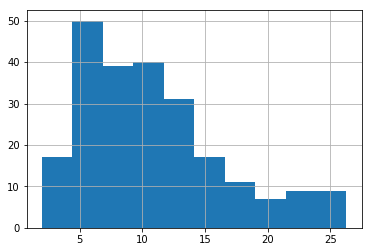

In [26]:
wages_College['Hwage'].hist()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


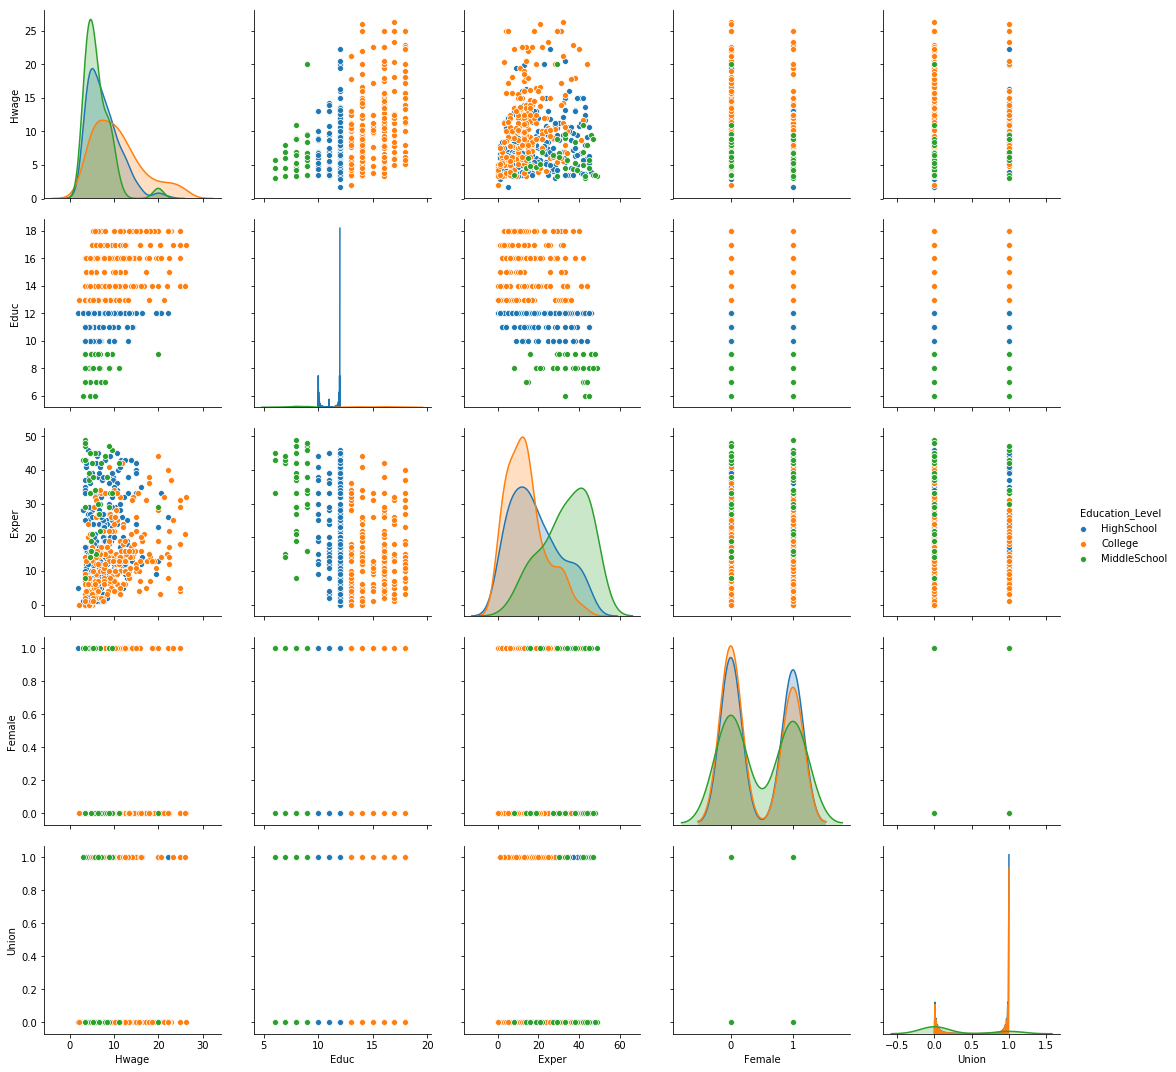

In [27]:
# pd.concat([s1, s2], axis=1)

sns.pairplot(wages, hue='Education_Level', height=3);


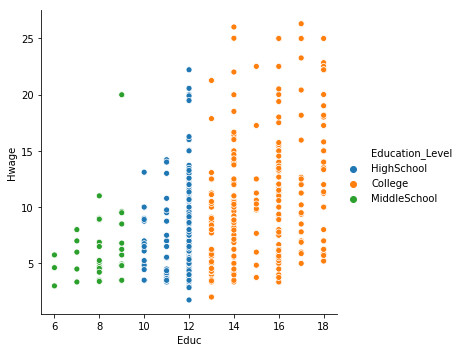

In [28]:
sns.relplot(x="Educ", y="Hwage", hue='Education_Level', data=wages);

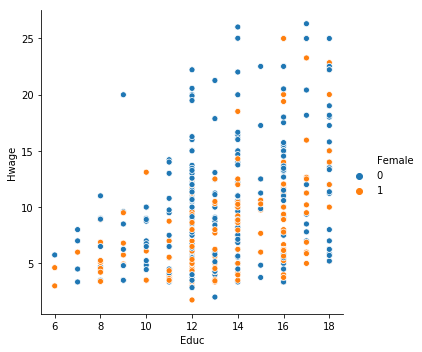

In [29]:
sns.relplot(x="Educ", y="Hwage", hue='Female', data=wages);

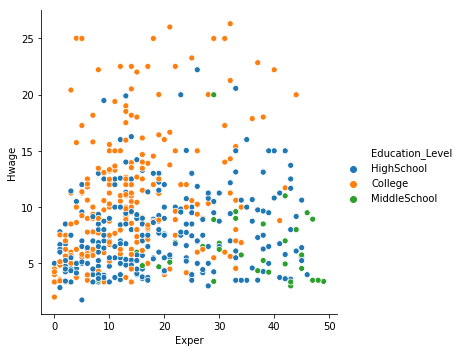

In [30]:
sns.relplot(x="Exper", y="Hwage", hue='Education_Level', data=wages);

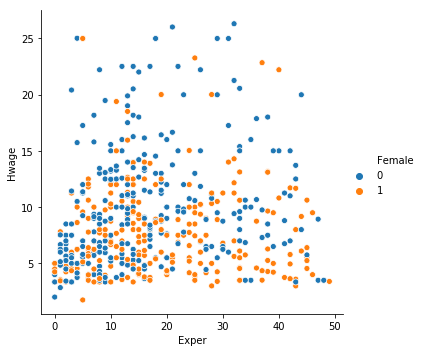

In [31]:
sns.relplot(x="Exper", y="Hwage", hue='Female', data=wages);

In [94]:
wages['logExper'] = np.log(wages['Exper'])
wages.head()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage,logExper
0,9.0,10,27,0,0,HighSchool,2.197225,3.295837
1,5.5,12,20,0,0,HighSchool,1.704748,2.995732
2,3.8,12,4,1,0,HighSchool,1.335001,1.386294
3,10.5,12,29,1,0,HighSchool,2.351375,3.367296
4,15.0,12,40,0,1,HighSchool,2.708050,3.688879


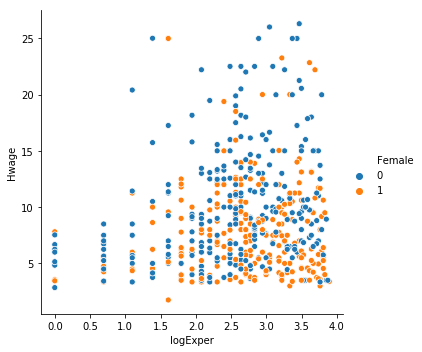

In [95]:
sns.relplot(x="logExper", y="Hwage", hue='Female', data=wages);

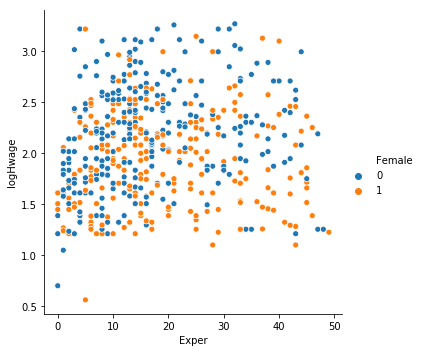

In [97]:
sns.relplot(x="Exper", y="logHwage", hue='Female', data=wages);

# There seems to be no discernible "linear" relationship between wages and experience

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


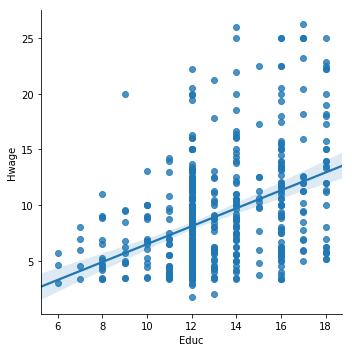

In [32]:
sns.lmplot('Educ', 'Hwage', data=wages);

In [33]:
# Let's try taking the logarithm of 'Hwage'

wages['logHwage'] = np.log(wages['Hwage'])
wages.head()

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
0,9.0,10,27,0,0,HighSchool,2.197225
1,5.5,12,20,0,0,HighSchool,1.704748
2,3.8,12,4,1,0,HighSchool,1.335001
3,10.5,12,29,1,0,HighSchool,2.351375
4,15.0,12,40,0,1,HighSchool,2.708050


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


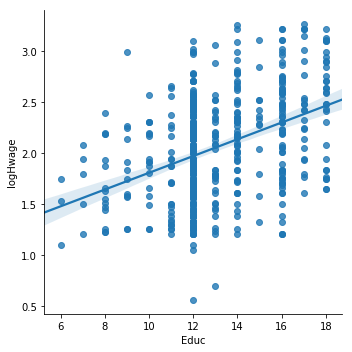

In [34]:
sns.lmplot('Educ', 'logHwage', data=wages);

In [70]:
# All Female DataFrame

wages_female = wages[wages['Female']==1]
wages_female.head()                                                        

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
2,3.80,12,4,1,0,HighSchool,1.335001
3,10.50,12,29,1,0,HighSchool,2.351375
5,9.00,16,27,1,0,College,2.197225
6,9.57,12,5,1,1,HighSchool,2.258633
9,5.00,12,14,1,0,HighSchool,1.609438


In [36]:
wages_female.describe()

,Hwage,Educ,Exper,Female,Union,logHwage
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000
mean,7.719424,13.008230,18.983539,1.0,0.115226,1.924860
std,4.108249,2.430848,12.553676,0.0,0.319954,0.478767
min,1.750000,6.000000,0.000000,1.0,0.000000,0.559616
25%,4.685000,12.000000,9.000000,1.0,0.000000,1.544270
50%,6.670000,12.000000,16.000000,1.0,0.000000,1.897620
75%,9.700000,15.000000,28.000000,1.0,0.000000,2.272113
max,24.980000,18.000000,49.000000,1.0,1.000000,3.218076


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


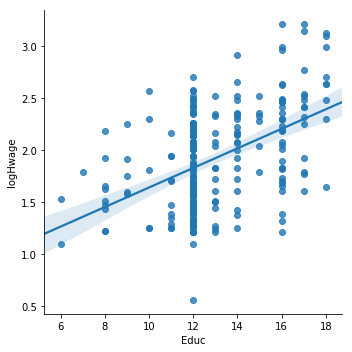

In [37]:
# Hwage vs. Education for Females

sns.lmplot('Educ', 'logHwage', data=wages_female);

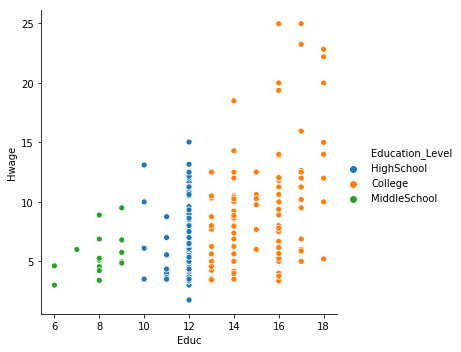

In [38]:
sns.relplot(x="Educ", y="Hwage", hue='Education_Level', data=wages_female);

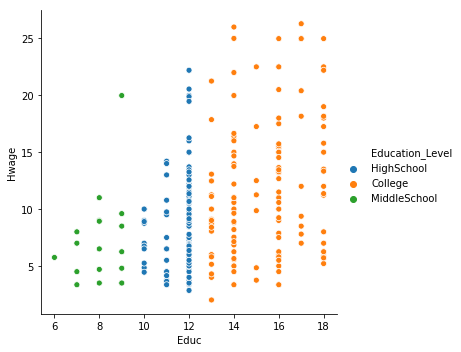

In [72]:
sns.relplot(x="Educ", y="Hwage", hue='Education_Level', data=wages_male);

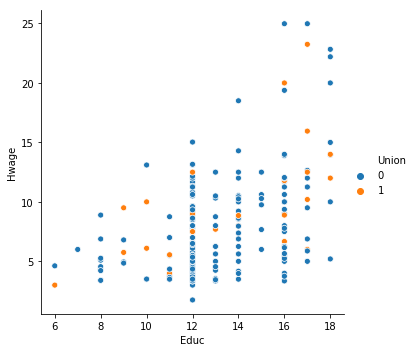

In [73]:
sns.relplot(x="Educ", y="Hwage", hue='Union', data=wages_female);

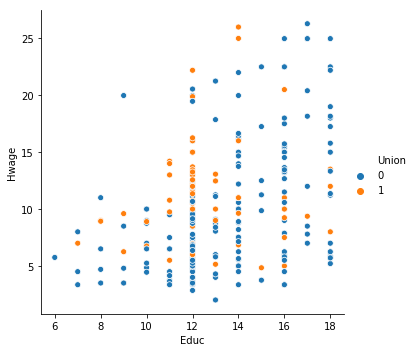

In [74]:
sns.relplot(x="Educ", y="Hwage", hue='Union', data=wages_male);

In [68]:
wages_female[wages_female['Union']==1].mean()

Hwage        9.606071
Educ        13.428571
Exper       21.821429
Female       1.000000
Union        1.000000
logHwage     2.164258
dtype: float64

In [71]:
wages_female[wages_female['Union']==1].describe()

,Hwage,Educ,Exper,Female,Union,logHwage
count,28.000000,28.000000,28.000000,28.0,28.0,28.000000
mean,9.606071,13.428571,21.821429,1.0,1.0,2.164258
std,4.548022,3.202182,13.219104,0.0,0.0,0.451169
min,3.000000,6.000000,3.000000,1.0,1.0,1.098612
25%,6.527500,11.750000,12.250000,1.0,1.0,1.875287
50%,8.870000,12.500000,18.500000,1.0,1.0,2.182672
75%,11.842500,16.250000,28.750000,1.0,1.0,2.471665
max,23.250000,18.000000,46.000000,1.0,1.0,3.146305


In [67]:
# Wages for females who are in the union are higher on average than non-unioned females, with the caveat that the 
# sample size for females=1, union=0 is very small

wages_female[wages_female["Union"]==0].mean()

Hwage        7.473721
Educ        12.953488
Exper       18.613953
Female       1.000000
Union        0.000000
logHwage     1.893683
dtype: float64

In [41]:
# All male DataFrame

wages_male = wages[wages['Female']==0]
wages_male.head()

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
0,9.0,10,27,0,0,HighSchool,2.197225
1,5.5,12,20,0,0,HighSchool,1.704748
4,15.0,12,40,0,1,HighSchool,2.708050
7,15.0,14,22,0,0,College,2.708050
8,11.0,8,42,0,0,MiddleSchool,2.397895


In [66]:
wages_male[wages['Union']==1].mean()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Hwage       11.288971
Educ        12.661765
Exper       20.573529
Female       0.000000
Union        1.000000
logHwage     2.346657
dtype: float64

In [65]:
wages_male[wages['Union']==0].mean()


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Hwage        9.671898
Educ        13.305556
Exper       15.328704
Female       0.000000
Union        0.000000
logHwage     2.122669
dtype: float64

In [44]:
# Again, the same type of relationship holds where wages are higher for men who are in a union compared to men who 
# aren't

In [45]:
wages.head()

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
0,9.0,10,27,0,0,HighSchool,2.197225
1,5.5,12,20,0,0,HighSchool,1.704748
2,3.8,12,4,1,0,HighSchool,1.335001
3,10.5,12,29,1,0,HighSchool,2.351375
4,15.0,12,40,0,1,HighSchool,2.708050


In [46]:
X = wages.loc[:, 'Educ':'Union'].values
y = wages['logHwage'].values

In [47]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X, y)

y_preds = lr.predict(X)

In [48]:
lr.coef_

array([ 0.10110328,  0.0121739 , -0.23987217,  0.21171188])

In [49]:
lr.intercept_

0.5940593024738758

In [50]:
# R-squared

from sklearn.metrics import r2_score

y_true = y
y_preds = y_preds

print("R^2: {:.2f}".format(r2_score(y_true, y_preds)))

R^2: 0.32


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.22
Test set score: 0.35


In [51]:
wages_female.head()

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
2,3.80,12,4,1,0,HighSchool,1.335001
3,10.50,12,29,1,0,HighSchool,2.351375
5,9.00,16,27,1,0,College,2.197225
6,9.57,12,5,1,1,HighSchool,2.258633
9,5.00,12,14,1,0,HighSchool,1.609438


In [52]:
# Let's try regress wages on just the female variables

X = wages_female[['Educ', 'Exper', 'Union']].values
y = wages_female['logHwage'].values

In [53]:
lr.fit(X, y)

lr.coef_

array([0.10923218, 0.00933663, 0.18873391])

In [54]:
lr.intercept_

0.30495367626946557

In [55]:
# And let's regress wages on just the male variables

X = wages_male[['Educ', 'Exper', 'Union']].values
y = wages_male['logHwage'].values

lr.fit(X, y)

lr.coef_

array([0.09497819, 0.01519528, 0.20543805])

In [56]:
lr.intercept_

0.6260069803115054

In [57]:
wages.head()

,Hwage,Educ,Exper,Female,Union,Education_Level,logHwage
0,9.0,10,27,0,0,HighSchool,2.197225
1,5.5,12,20,0,0,HighSchool,1.704748
2,3.8,12,4,1,0,HighSchool,1.335001
3,10.5,12,29,1,0,HighSchool,2.351375
4,15.0,12,40,0,1,HighSchool,2.708050


In [58]:
wages.groupby('Female').mean()

,Hwage,Educ,Exper,Union,logHwage
Female,,,,,
0,10.059085,13.151408,16.584507,0.239437,2.17630
1,7.719424,13.008230,18.983539,0.115226,1.92486


In [64]:
wages.groupby('Union').mean()

,Hwage,Educ,Exper,Female,logHwage
Union,,,,,
0,8.575360,13.129930,16.967517,0.498840,2.008441
1,10.798125,12.885417,20.937500,0.291667,2.293457


In [62]:
wages.groupby('Education_Level').mean()

,Hwage,Educ,Exper,Female,Union,logHwage
Education_Level,,,,,,
College,10.896348,15.356522,14.100000,0.434783,0.169565,2.254871
HighSchool,7.658626,11.767176,18.729008,0.480916,0.183206,1.931871
MiddleSchool,6.282286,8.028571,33.514286,0.485714,0.257143,1.743991


In [87]:
female_education_pivot = pd.pivot_table(wages, index=['Female', 'Union', 'Education_Level'], aggfunc='mean')
female_education_pivot

Educ      Exper      Hwage  logHwage
Female Union Education_Level                                           
0      0     College          15.438095  13.914286  11.850190  2.324972
             HighSchool       11.696970  14.919192   7.684646  1.947541
             MiddleSchool      7.916667  31.083333   7.006667  1.797323
       1     College          15.080000  14.360000  11.646000  2.361215
             HighSchool       11.729730  21.837838  11.681622  2.401693
             MiddleSchool      8.333333  38.666667   7.380000  1.946610
1      0     College          15.209302  13.790698   9.359767  2.115601
             HighSchool       11.869565  20.617391   6.336000  1.760931
             MiddleSchool      8.000000  31.785714   5.233571  1.620932
       1     College          16.142857  16.928571  11.842857  2.394730
             HighSchool       11.454545  22.818182   7.720000  1.997629
             MiddleSchool      8.000000  41.000000   6.083333  1.699701

In [90]:
wages_2 = wages.copy()

wages_2 = wages_2[['Hwage', 'Female', 'Union', 'Education_Level']]
wages_2.head()

,Hwage,Female,Union,Education_Level
0,9.0,0,0,HighSchool
1,5.5,0,0,HighSchool
2,3.8,1,0,HighSchool
3,10.5,1,0,HighSchool
4,15.0,0,1,HighSchool


In [92]:
female_education_pivot_2 = pd.pivot_table(wages_2, index=['Female', 'Union', 'Education_Level'], aggfunc='mean')
female_education_pivot_2

Hwage
Female Union Education_Level           
0      0     College          11.850190
             HighSchool        7.684646
             MiddleSchool      7.006667
       1     College          11.646000
             HighSchool       11.681622
             MiddleSchool      7.380000
1      0     College           9.359767
             HighSchool        6.336000
             MiddleSchool      5.233571
       1     College          11.842857
             HighSchool        7.720000
             MiddleSchool      6.083333